# 1--关系绘图

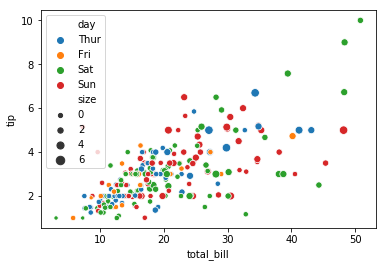

In [7]:
import seaborn as sns
tips =sns.load_dataset("tips",cache=True)  #
# sns.relplot(x="total_bill",y="tip",data=tips,hue="day",col='sex',row='time')
# hue 参数 设置不同的颜色，可以区分不同的数据，
# col/row 可以按不同的类别绘图 
# col_wrap 第几列自动换行
# sns.relplot('total_bill',"tip",data=tips,col='day',col_wrap=2)
#size 显示不同的数据 以点的大小
sns.scatterplot(x="total_bill",y="tip",data=tips,size='size',legend="brief",hue='day')  #作用和relplot一样，是对relplot的封装

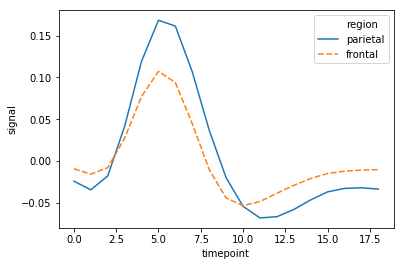

In [12]:
fmri = sns.load_dataset('fmri')
# fmri.head()
#做line类型的图
# sns.relplot(x="timepoint",y="signal",data=fmri,kind='line',hue='region',col='event',style='region')
# ci 显示置信区间  ci=True
# style 区分显示线条f
sns.lineplot(x="timepoint", y="signal", data=fmri, hue='region',style='region',ci=None)

#### 分类图

In [29]:
# 分类散点图   swarmplot 蜂群  stripplot 默认
import seaborn as sns
from matplotlib import pyplot as plt
tips = sns.load_dataset("tips",cache=True)
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


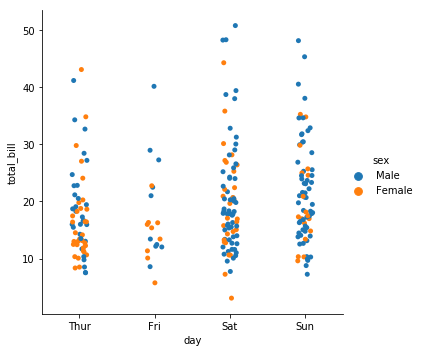

In [23]:
sns.catplot(x='day', y='total_bill', data=tips, hue='sex')

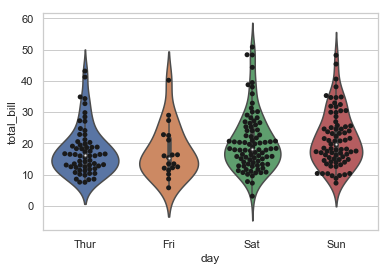

In [145]:
#让点不重叠 适用于小数据量
sns.swarmplot(x='day', y='total_bill',data=tips,color='k')
sns.violinplot(x='day', y='total_bill',data=tips)

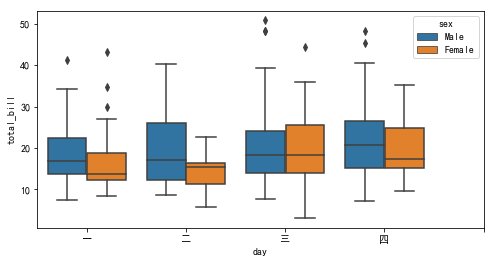

In [52]:
# 箱线图
plt.figure(figsize=(8,4))
plt.rcParams['font.sans-serif'] = ["SimHei"]
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')
plt.xticks([i for i in range(0,5)],['一','二','三','四'])
plt.show()

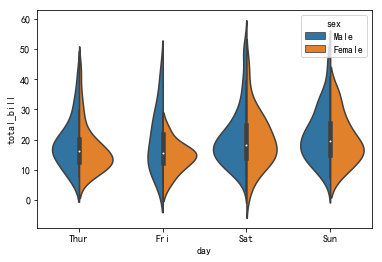

In [53]:
# 小提琴图 violinplot   利用核函数拟合而成，入高斯函数
# inner 参数  中间绘制的是什么图 默认箱线图 
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

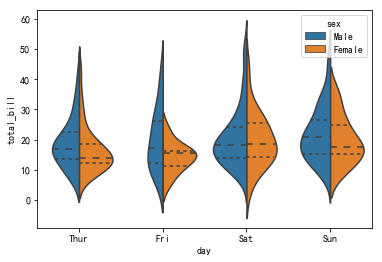

In [56]:
sns.violinplot(x='day', y='total_bill', data=tips, inner='quartile',split=True, hue='sex')

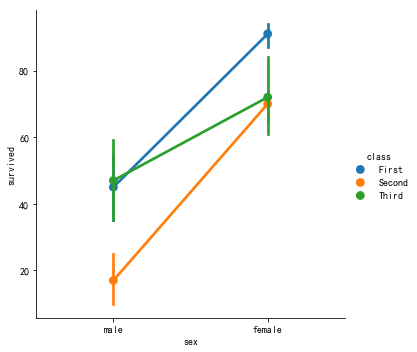

In [80]:
# 直方图与 点线图
titanic = sns.load_dataset('titanic')

titanic.head()
sns.catplot(x='sex', y='survived', data=titanic,kind='point',estimator=sum, hue='class')

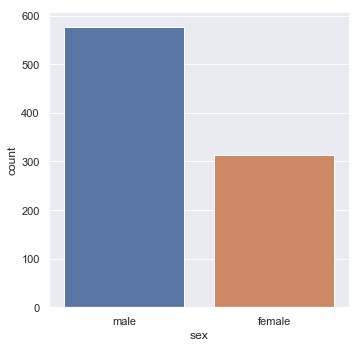

In [139]:
sns.catplot(x='sex', data=titanic, kind='count')

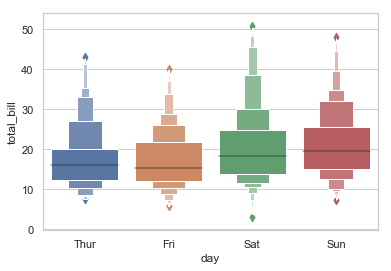

In [142]:
sns.set(style='whitegrid')
sns.boxenplot(x='day', y='total_bill', data=tips)

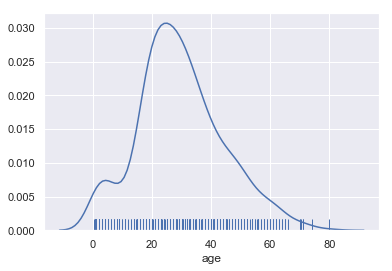

In [106]:
# 单一变量 作图 直方图，kde曲线，rug数据密集 kde  比例
import numpy as np
sns.set(color_codes=True)
the_titanic = titanic[~np.isnan(titanic['age'])]
sns.distplot(the_titanic['age'],rug=True, hist=False)

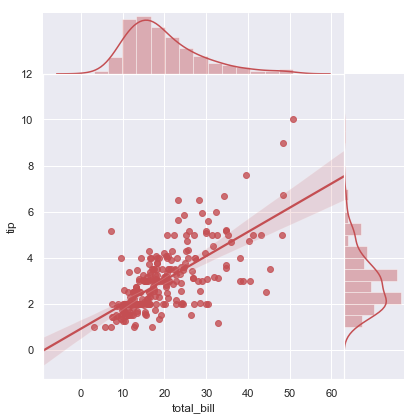

In [118]:
# 二变量绘图
sns.jointplot(x='total_bill', y='tip', data=tips,kind='reg', space=0, color='r')

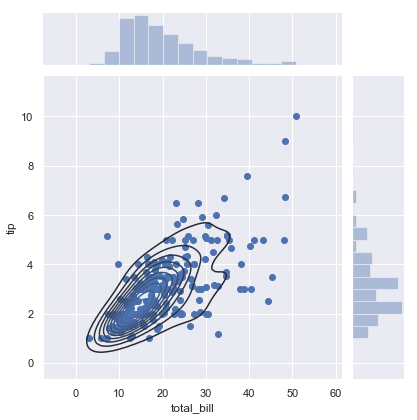

In [121]:
sns.jointplot('total_bill', 'tip', data=tips).plot_joint(sns.kdeplot)

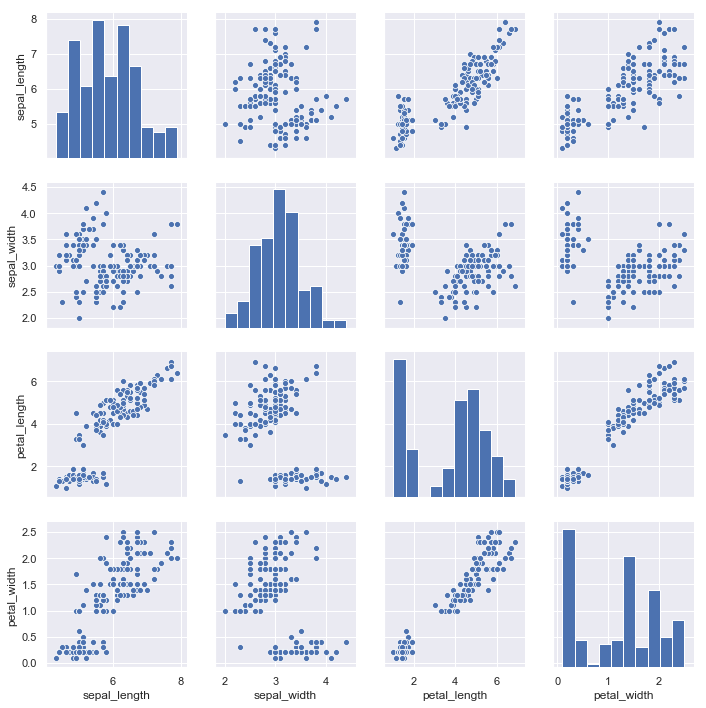

In [126]:
# 成对绘图 pairplot
iris = sns.load_dataset('iris')
sns.pairplot(data=iris, vars=['sepal_length','sepal_width','petal_length','petal_width'])

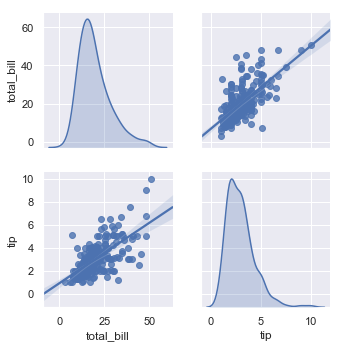

In [135]:
sns.pairplot(data=tips, vars=['total_bill', 'tip'], kind='reg', diag_kind='kde')

In [136]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

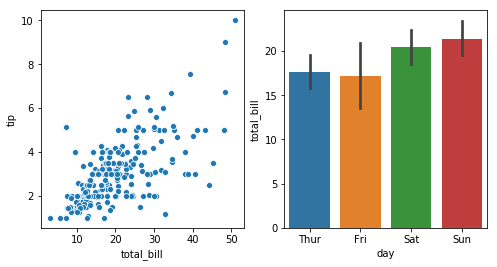

In [3]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(8,4))
sns.scatterplot(x='total_bill', y='tip', data=tips, ax=ax1)
sns.barplot(x='day',y='total_bill', data=tips, ax=ax2)

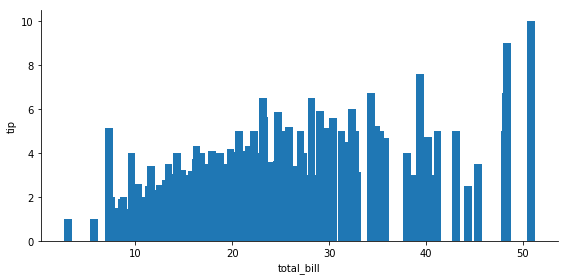

In [4]:
# FaceGrid 一次绘制多个图
fg = sns.FacetGrid(tips,height=4,aspect=2)
fg.map(plt.bar, 'total_bill', 'tip')

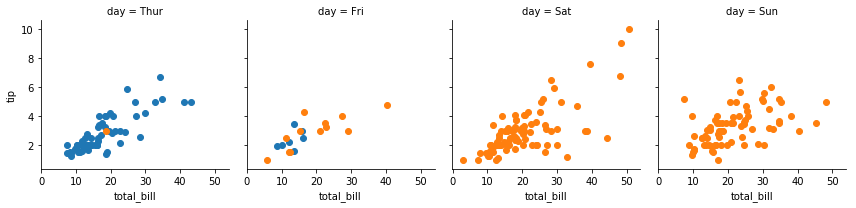

In [5]:
fg2 = sns.FacetGrid(tips, col='day', hue='time')
fg2.map(plt.scatter, 'total_bill', 'tip')

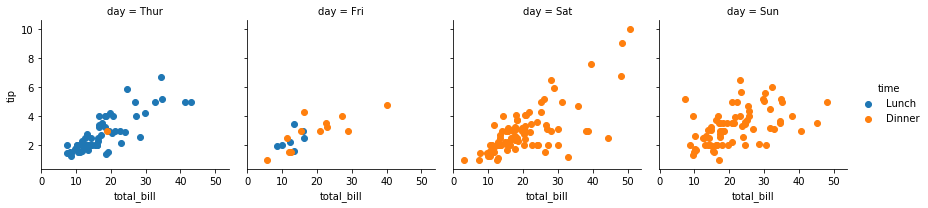

In [12]:
fg3 = sns.FacetGrid(tips,col='day',hue='time')
fg3.map(plt.scatter,'total_bill', 'tip')
fg3.add_legend()

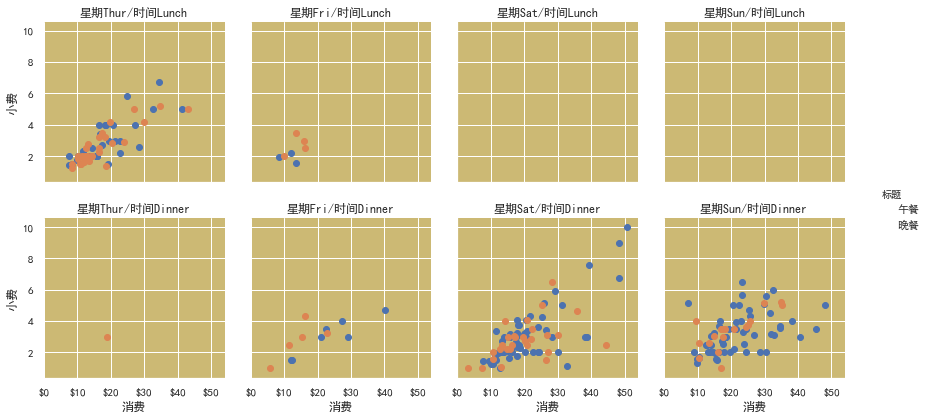

In [52]:
# 设置图例
sns.set(rc={"font.sans-serif":"SimHei"})
g = sns.FacetGrid(tips,col='day', row='time',hue='sex')
g.map(plt.scatter, 'total_bill', 'tip')
# g.add_legend(title='标题',labels=['午餐','晚餐'], label_order=['Lunch','Dinner'])  #不推荐使用
g.add_legend(title='标题', label_order=['Lunch','Dinner'])
new_labels = ['午餐','晚餐']
for text,label in zip(g._legend.texts, new_labels):
    text.set_text(label)

g.set_titles(template="星期{col_name}/时间{row_name}")   # 模板
g.set_axis_labels('消费','小费')
g.set(facecolor='y')   #看AXes上有什么属性
g.set(xticks=range(0,60,10),xticklabels=["$%d"%x for x in range(0,60,10)])
g.fig.set_dpi=100  #figure 对象 分辨率

In [34]:
g._legend.texts

[Text(0, 0, '午餐'), Text(0, 0, '晚餐')]

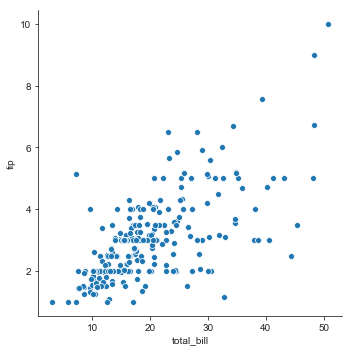

In [12]:
# 样式和风格  默认有5种
import seaborn as sns
# sns.set_style('white')
# sns.set_style("whitegrid")
# sns.set_style("dark")
# sns.set_style('darkgrid')
sns.set_style('ticks')
tips = sns.load_dataset("tips")
sns.relplot(data=tips,x='total_bill',y='tip')

In [13]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

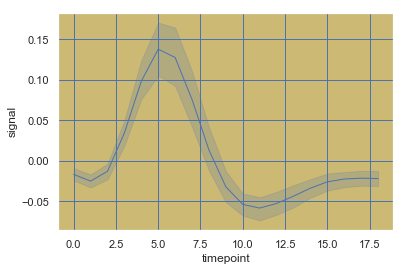

In [39]:
#必须放在with语句中  设置axes的样式
sns.set(rc={"lines.linewidth":'1'})
fmri = sns.load_dataset('fmri')
with sns.axes_style('darkgrid',rc={'axes.facecolor':'y','grid.color': 'b'},):
    sns.lineplot(x='timepoint',y='signal', data=fmri)


In [33]:
# 调色盘
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


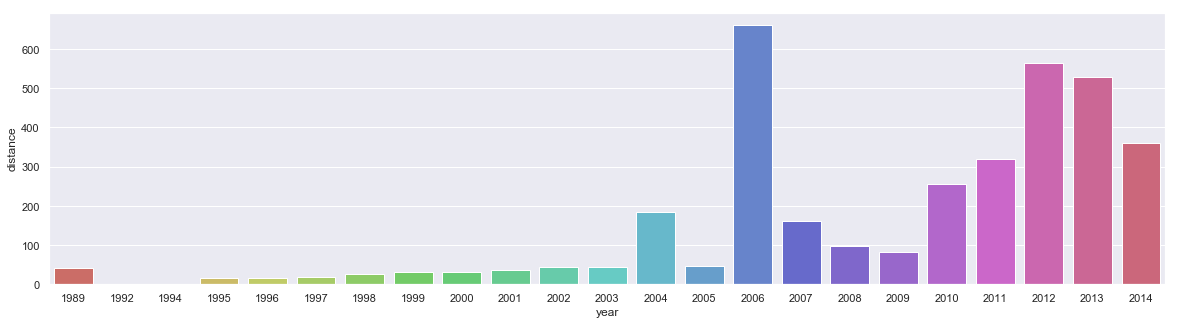

In [48]:
plt.figure(figsize=(20,5))
sns.barplot(x='year', y='distance',data=planets, ci=None,
            palette=sns.color_palette('hls',n_colors=23))

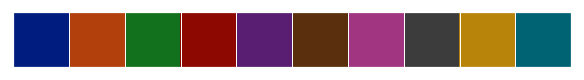

In [56]:
current_palette = sns.color_palette("dark",n_colors=10) #hls,bright
sns.palplot(current_palette)

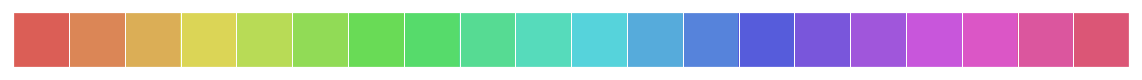

In [60]:
sns.palplot(sns.color_palette('hls',20))

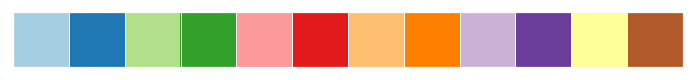

In [62]:
# 分类
sns.palplot(sns.color_palette("Paired"))

In [65]:
sns.choose_colorbrewer_palette("qaulitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

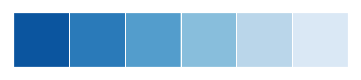

In [68]:
# 渐变调色盘
sns.palplot(sns.color_palette("Blues_r"))

In [70]:
sns.choose_colorbrewer_palette("sequential")

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

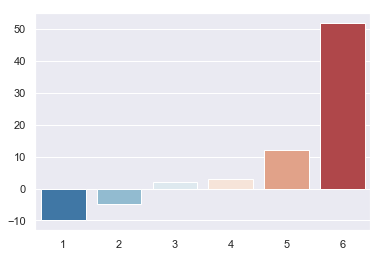

In [81]:
#离散调色盘
values = [12,52,2,-10,3,-5]
with sns.color_palette("RdBu_r"):
    sns.barplot(list(range(1,7)),sorted(values))

In [86]:
sns.choose_colorbrewer_palette("diverging")

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988467, 0.09227220299884642, 0.16770472895040373),
 (0.8392156862745099, 0.376470588235294, 0.3019607843137253),
 (0.9545559400230679, 0.641753171856978, 0.5057285659361783),
 (0.9921568627450982, 0.8588235294117645, 0.7803921568627449),
 (0.9657054978854286, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862745, 0.9411764705882353),
 (0.5664744329104192, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.576470588235294, 0.7647058823529411),
 (0.1272587466359093, 0.39584775086505203, 0.6687427912341407)]

Text(0.5, 1.0, '温度走地图')

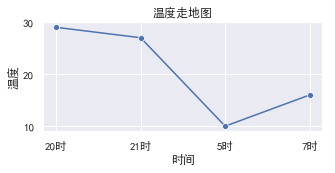

In [132]:
# 作业

sns.set(rc={"font.sans-serif":"SimHei"})
temps =[29,27,10,16]
hours = ["20时","21时",'5时',"7时"]
plt.figure(figsize=(5,2))
axes = sns.lineplot(range(0,4),temps,marker="o")
axes.set_xticks(range(0,4))
axes.set_xticklabels(hours)
axes.set_xlabel("时间")
axes.set_ylabel("温度")
axes.set_title("温度走地图")

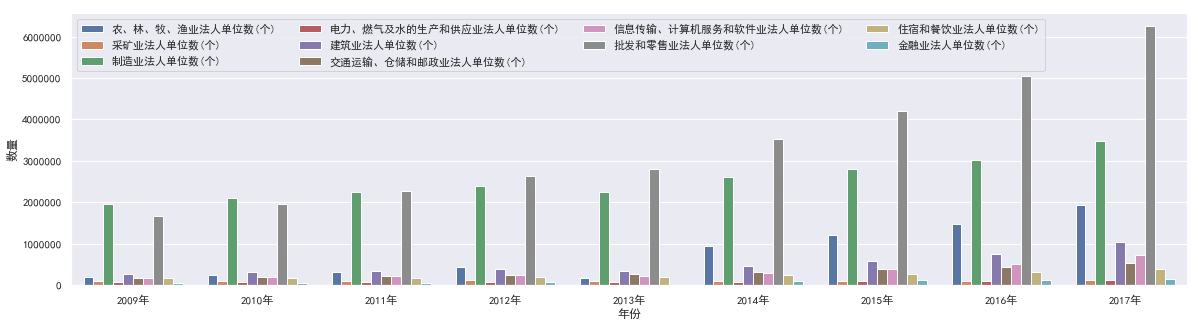

In [180]:
legals = pd.read_csv("F:/05seaborn/法人人数年度数据.csv",encoding='GB18030')
new_legals = legals[1:11]
new_df = pd.DataFrame()
for index in new_legals.index:
    row_values = new_legals.loc[index]
    for x in range(2009,2018):
        year = "%d年"%x
        series = pd.Series({"指标":row_values["指标"],
                            "年份":year,"数量":row_values[year]})
        new_df = pd.concat([new_df,series.to_frame().T])
new_df.reset_index(drop=True,inplace=True)   

plt.figure(figsize=(20,5))
sns.barplot(x="年份",y='数量',data=new_df,hue="指标")
plt.legend(ncol=4)

In [184]:
lianjia = pd.read_csv("F:/05seaborn/lianjia.csv",encoding="utf-8")

<Figure size 720x360 with 0 Axes>

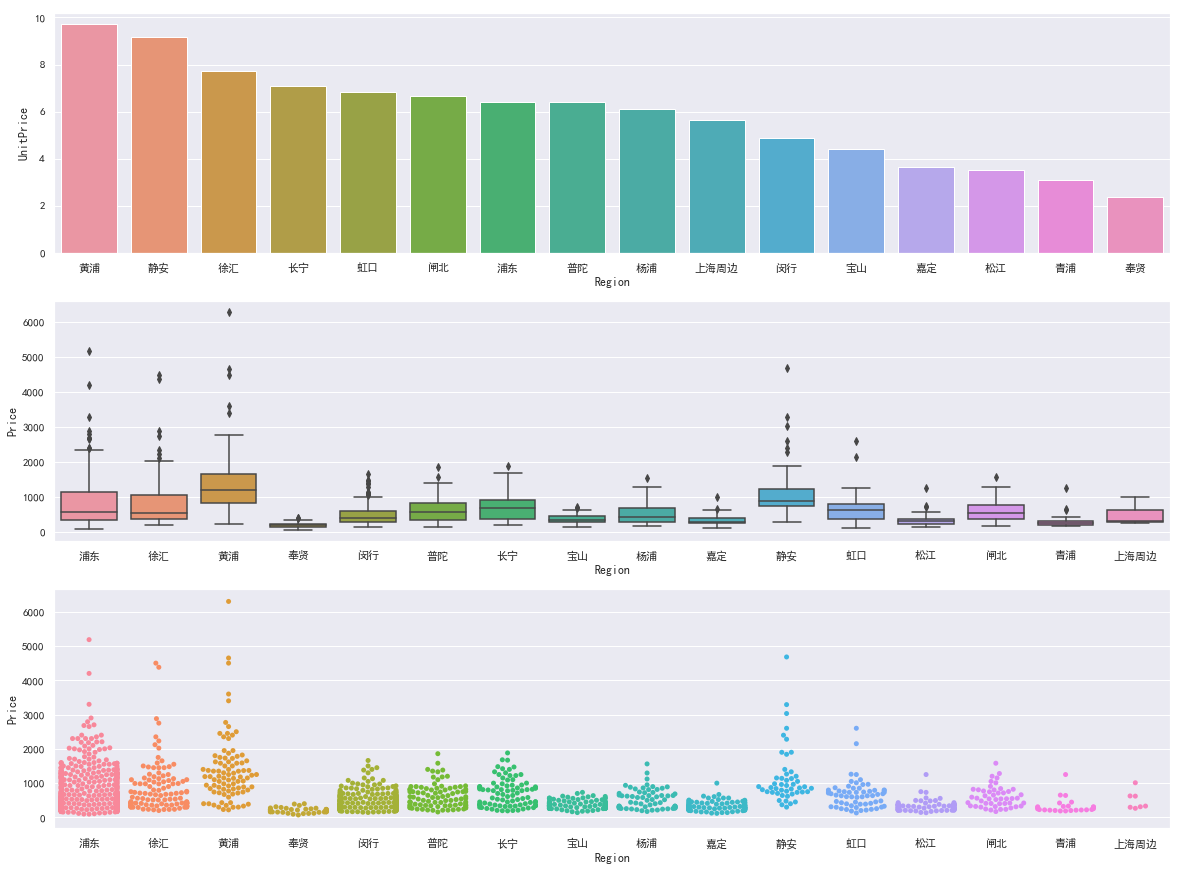

In [205]:
plt.figure(figsize=(10,5))
house_mean = lianjia.groupby('Region')['UnitPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
fig, axes = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='Region',y='UnitPrice',data=house_mean,ax=axes[0])
sns.boxplot(x='Region',y='Price',data=lianjia,ax=axes[1])
sns.swarmplot(x='Region',y='Price',data=lianjia,ax=axes[2])

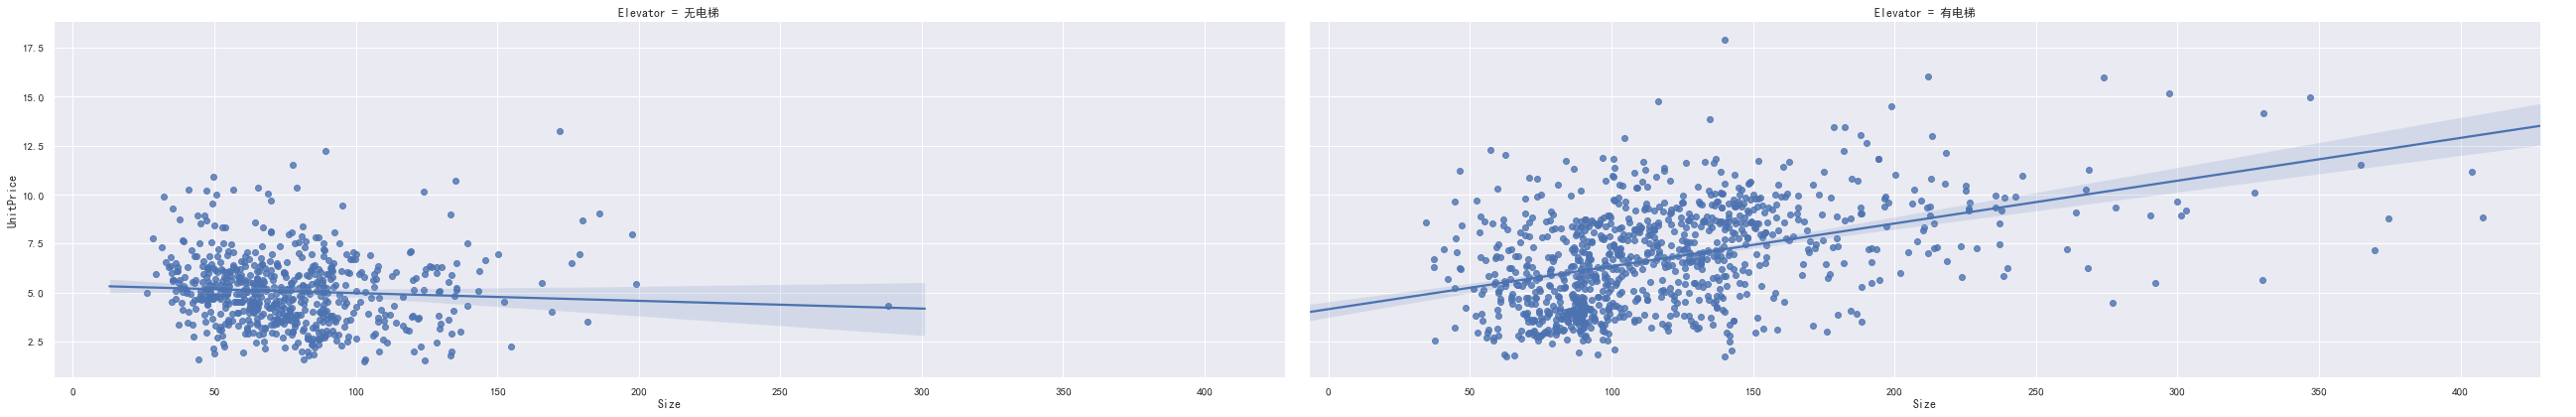

In [209]:
g = sns.FacetGrid(lianjia,col="Elevator",height=6,aspect=3)
g.map(sns.regplot,"Size","UnitPrice")
g.add_legend()

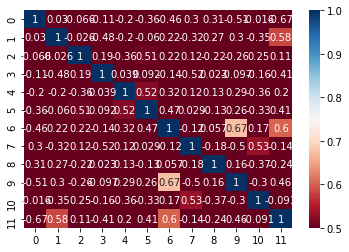

In [7]:
# 特征相关性
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
data = pd.DataFrame(np.random.rand(10,12))
sns.heatmap(data.corr(),cmap=colormap, annot=True,vmax=1.0,vmin=0.5)